<a href="https://colab.research.google.com/github/camillerose/Auditory_Stimulus_Generator/blob/master/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [68]:
!curl https://course-v3.fast.ai/setup/colab | bash

from fastai import *
from fastai.vision import *
import numpy as np
import matplotlib.pyplot as plt
import os

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   287  100   287    0     0    784      0 --:--:-- --:--:-- --:--:--   784
bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">'
Mounted at /content/drive


First I will train the model to get a better sense of the data set. It will inform if there are mislabels or images that do not belong.

In [104]:
path = Path('/content/drive/My Drive/data_science/projects/monkey_classification/data/new_world_monkeys')
os.listdir(path)

['spider',
 'squirrel',
 'saki',
 'woolly',
 'night',
 'capuchins',
 'tamarins',
 'howlers',
 'marmosets']

In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

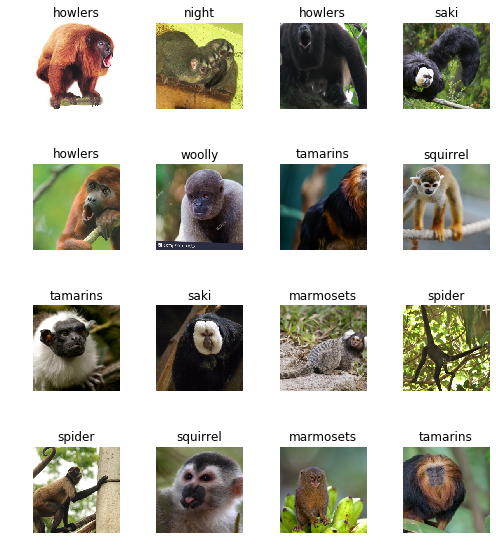

In [112]:
data.show_batch(rows=4, figsize=(7,8))

In [107]:
print(data.classes)

['capuchins', 'howlers', 'marmosets', 'night', 'saki', 'spider', 'squirrel', 'tamarins', 'woolly']


I will use a convolutional neural network backbone and a fully connected head with a single hidden layer as a classifier. I will train for 4 epochs (4 cycles through all the data).

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [121]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [132]:
learn.fit_one_cycle(4,0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.580009,0.640714,0.150000,00:08
1,0.577551,0.515361,0.100000,00:08
2,0.524215,0.442081,0.100000,00:09
3,0.485036,0.411122,0.100000,00:09


In [133]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

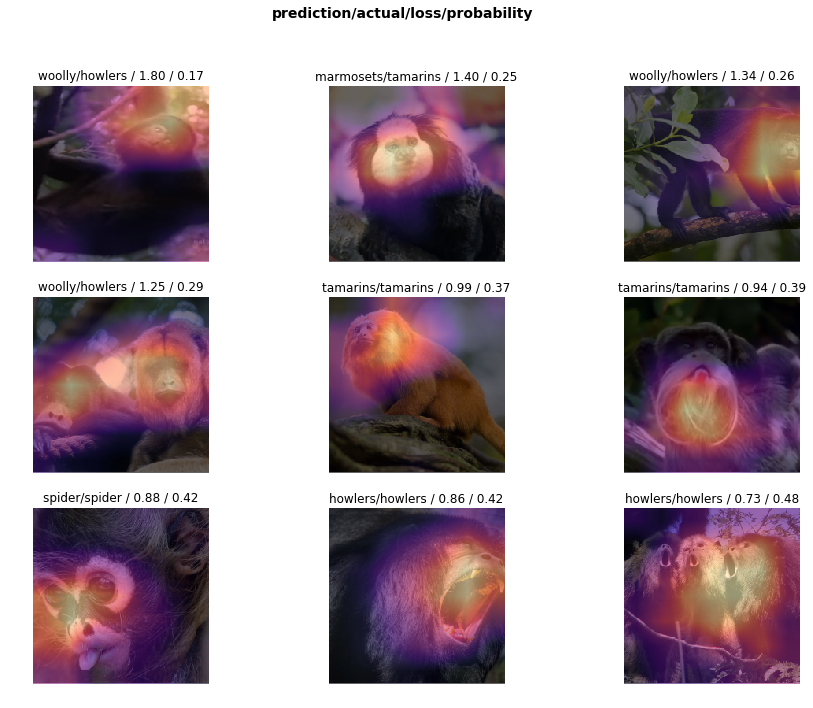

In [135]:
interp.plot_top_losses(9, figsize=(15,11))

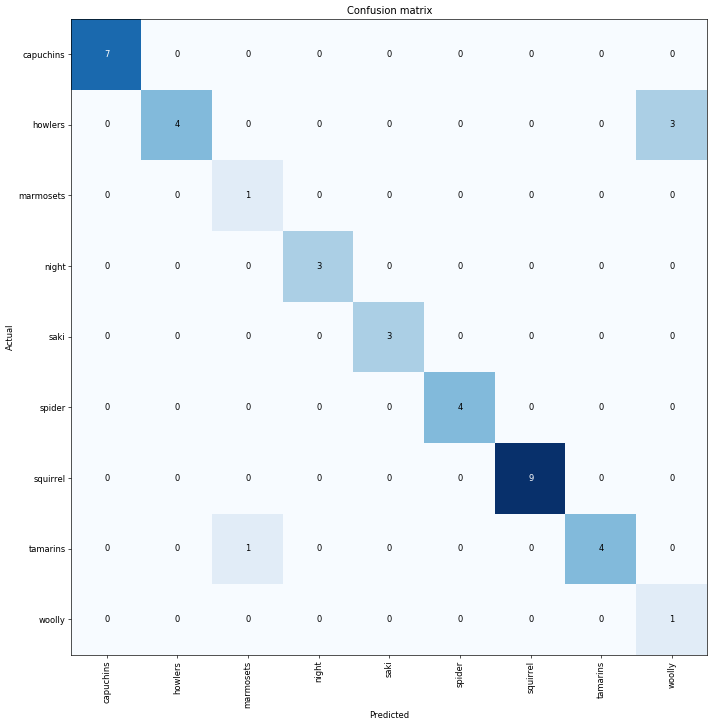

In [136]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
learn.save('monkey34')